In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV

C:\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
## 设置属性防止中文乱码
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
# 花萼长度、花萼宽度，花瓣长度，花瓣宽度
iris_feature_E = 'sepal length', 'sepal width', 'petal length', 'petal width'
iris_feature_C = u'花萼长度', u'花萼宽度', u'花瓣长度', u'花瓣宽度'
iris_class = 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'

In [4]:
## 读取数据
path = './datas/iris.data'  # 数据文件路径
data = pd.read_csv(path, header=None)
x = data[range(4)]
y = pd.Categorical(data[4]).codes ## 直接将数据特征转换为0，1,2
print "总样本数目：%d；特征属性数目：%d" % x.shape

总样本数目：150；特征属性数目：4


In [5]:
## 0. 数据分割，形成模型训练数据和测试数据
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, train_size=0.8, random_state=14)
x_train, x_test, y_train, y_test = x_train1, x_test1, y_train1, y_test1
print "训练数据集样本数目：%d, 测试数据集样本数目：%d" % (x_train.shape[0], x_test.shape[0])

训练数据集样本数目：120, 测试数据集样本数目：30


In [6]:
## 2. 数据量化/归一化,常用方式：
## a. 模型创建
ss = MinMaxScaler()
## b. 模型训练及数据转换
x_train = ss.fit_transform(x_train, y_train)
x_test = ss.transform(x_test)

In [7]:
## 3. 特征选择
## a. 模型构建
ch2 = SelectKBest(chi2, k=3)
## b. 模型训练及数据转换
x_train = ch2.fit_transform(x_train, y_train)
x_test = ch2.transform(x_test)
## c. 输出模型最终选择的列
select_name_index = ch2.get_support(indices=True)
print "对类别判断影响最大的三个特征属性分布是:", ch2.get_support(indices=False)

对类别判断影响最大的三个特征属性分布是: [ True False  True  True]


In [8]:
## 4. 降维
## a. 构建一个PCA对象，设置最终维度为两维
pca = PCA(n_components=2)
## b. 训练模型及数据
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [9]:
## 5. 模型构建及训练 
## a. 模型构建
model = DecisionTreeClassifier(criterion='entropy')
## b. 模型训练
model.fit(x_train, y_train)
## c. 模型预测
y_test_hat = model.predict(x_test) 

In [17]:
y1= model.predict_proba(x_test)

In [19]:
y_test_hat

array([0, 0, 0, 1, 2, 1, 0, 1, 0, 1, 1, 0, 2, 2, 0, 1, 0, 2, 2, 1, 0, 0, 0,
       1, 0, 2, 0, 1, 1, 0], dtype=int8)

In [18]:
y1

array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.]])

In [10]:
from sklearn.externals.six import StringIO
with open("iris.dot", 'w') as f:
    f = tree.export_graphviz(model, out_file=f)

In [11]:
## 6. 效果评估
## 准确率：预测对的占总的比率
y_test2 = y_test.reshape(-1)
result = (y_test2 == y_test_hat)
print "准确率:%.2f%%" % (np.mean(result) * 100)
## 实际可用通过参数获取
print "Score：", model.score(x_test, y_test)
print "Classes:", model.classes_

准确率:96.67%
Score： 0.966666666667
Classes: [0 1 2]


In [12]:
## 7. 画图1: 创建线性模拟数据及预测值
N = 100  
x1_min = np.min((x_train.T[0].min(), x_test.T[0].min()))
x1_max = np.max((x_train.T[0].max(), x_test.T[0].max()))
x2_min = np.min((x_train.T[1].min(), x_test.T[1].min()))
x2_max = np.max((x_train.T[1].max(), x_test.T[1].max()))

t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, N)
x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
x_show = np.dstack((x1.flat, x2.flat))[0] # 测试点

y_show_hat = model.predict(x_show)  # 预测值

y_show_hat = y_show_hat.reshape(x1.shape)  # 使之与输入的形状相同
print y_show_hat.shape
y_show_hat[0]

(100L, 100L)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2], dtype=int8)

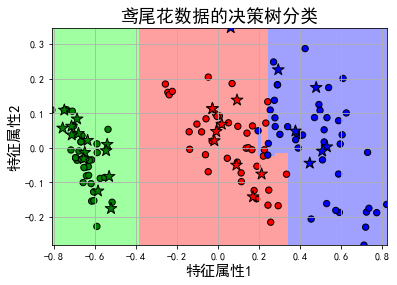

In [13]:
## 7. 画图2：画图
plt_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
plt_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])

plt.figure(facecolor='w')
plt.pcolormesh(x1, x2, y_show_hat, cmap=plt_light)  # 预测值的显示（区域的显示）
plt.scatter(x_test.T[0], x_test.T[1], c=y_test.ravel(), edgecolors='k', s=150, zorder=10, cmap=plt_dark, marker='*')  # 测试数据
plt.scatter(x_train.T[0], x_train.T[1], c=y_train.ravel(), edgecolors='k', s=40, cmap=plt_dark)  # 全部数据
plt.xlabel(u'特征属性1', fontsize=15)
plt.ylabel(u'特征属性2', fontsize=15)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid(True)
plt.title(u'鸢尾花数据的决策树分类', fontsize=18)
plt.show()

In [14]:
## 8. 参数优化
pipe = Pipeline([
            ('mms', MinMaxScaler()),
            ('skb', SelectKBest(chi2)),
            ('pca', PCA()),
            ('decision', DecisionTreeClassifier())
        ])

# 参数
parameters = {
    "skb__k": [1,2,3,4],
    "pca__n_components": [0.5,1.0],
    "decision__criterion": ["gini", "entropy"],
    "decision__max_depth": [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
}

x_train2, x_test2, y_train2, y_test2 = x_train1, x_test1, y_train1, y_test1

## 模型创建
gscv = GridSearchCV(pipe, param_grid=parameters)
## 模型训练
gscv.fit(x_train2, y_train2)

## 算法最优解
print "最优参数列表:", gscv.best_params_
print "score值：",gscv.best_score_

## 预测值
y_test_hat2 = gscv.predict(x_test2)

C:\Anaconda2\lib\site-packages\sklearn\decomposition\pca.py:418: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.components_ = components_[:n_components]
C:\Anaconda2\lib\site-packages\sklearn\decomposition\pca.py:420: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.explained_variance_ = explained_variance_[:n_components]
C:\Anaconda2\lib\site-packages\sklearn\decomposition\pca.py:422: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  explained_variance_ratio_[:n_components]
C:\Anaconda2\lib\site-packages\sklearn\decomposition\pca.py:325: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  U = U[:, :self.n_components_]
C:\Anaconda2\lib\site-packages\sklearn\decomposition\pca.py:332: VisibleDeprecationWarning: using

最优参数列表: {'decision__criterion': 'gini', 'decision__max_depth': 2, 'pca__n_components': 0.5, 'skb__k': 2}
score值： 0.933333333333


In [15]:
## 使用最优参数看看正确率
mms_best = MinMaxScaler()
skb_best = SelectKBest(chi2, k=2)
pca_best = PCA(n_components=0.5)
decision3 = DecisionTreeClassifier(criterion='gini', max_depth=2)

x_train3, x_test3, y_train3, y_test3 = x_train1, x_test1, y_train1, y_test1
x_train3 = pca_best.fit_transform(skb_best.fit_transform(mms_best.fit_transform(x_train3, y_train3), y_train3))
x_test3 = pca_best.transform(skb_best.transform(mms_best.transform(x_test3)))
decision3.fit(x_train3, y_train3)

print "正确率:", decision3.score(x_test3, y_test3)

正确率: 1.0


1深度，正确率0.55556
2深度，正确率0.73333
3深度，正确率0.77778
4深度，正确率0.73333
5深度，正确率0.68889
6深度，正确率0.68889
7深度，正确率0.68889
8深度，正确率0.66667
9深度，正确率0.66667
10深度，正确率0.66667
11深度，正确率0.66667
12深度，正确率0.66667
13深度，正确率0.66667
14深度，正确率0.66667


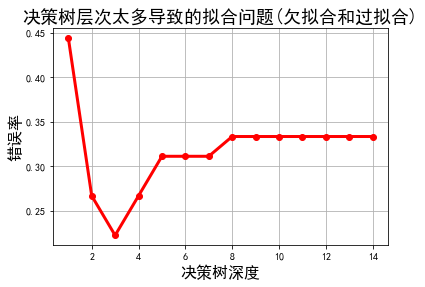

In [16]:
## 基于原始数据前三列比较一下决策树在不同数深度的情况下的错误率(不进行预处理的原因是，预处理后，效果会非常好)
x_train4, x_test4, y_train4, y_test4 = train_test_split(x.iloc[:, :2], y, train_size=0.7, random_state=14)

depths = np.arange(1, 15)
err_list = []
for d in depths:
    clf = DecisionTreeClassifier(criterion='gini', max_depth=d)
    clf.fit(x_train4, y_train4)
    
    score = clf.score(x_test4, y_test4)
    err = 1 - score
    err_list.append(err)
    print "%d深度，正确率%.5f" % (d, score)

## 画图
plt.figure(facecolor='w')
plt.plot(depths, err_list, 'ro-', lw=3)
plt.xlabel(u'决策树深度', fontsize=16)
plt.ylabel(u'错误率', fontsize=16)
plt.grid(True)
plt.title(u'决策树层次太多导致的拟合问题(欠拟合和过拟合)', fontsize=18)
plt.show()